In [1]:
import scanpy as sc
import os

In [2]:
adata = sc.read("../../../../data/adata_pancreas_2019.h5ad")

In [3]:
adata

AnnData object with n_obs × n_vars = 20519 × 16206
    obs: 'day', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'proliferation', 'G2M_score', 'S_score', 'clusters_fig3_final', 'clusters_fig3_final_noep', 'clusters_fig4_final', 'clusters_fig2_final', 'clusters_fig6_broad_final', 'clusters_fig6_fine_final', 'clusters_fig6_alpha_final', 'celltype'
    var: 'n_cells', 'highly_variable_genes', 'expression_mean', 'dispersion'
    uns: 'clusters_fig6_fine_final_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'spliced', 'unspliced'
    obsp: 'connectivities', 'distances'

In [4]:
adata.obs["celltype"].cat.categories

Index(['Multipotent', 'Tip', 'Acinar', 'Trunk', 'Ductal', 'Ngn3 low EP',
       'Ngn3 High early', 'Ngn3 High late', 'Fev+ Beta', 'Beta', 'Fev+ Alpha',
       'Alpha', 'Fev+ Pyy', 'Fev+ Delta', 'Fev+ Epsilon', 'Delta', 'Epsilon'],
      dtype='object')

In [5]:
adata_endocrine = adata[~adata.obs["celltype"].isin(["Acinar", "Ductal", "Tip", "Trunk", "Multipotent"])]

In [6]:
sc.pp.highly_variable_genes(adata_endocrine, subset=True)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/preprocessing/_highly_variable_genes.py:540: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['hvg'] = {'flavor': flavor}


In [7]:
adata_endocrine.shape

(7197, 1951)

In [8]:
sc.pp.pca(adata_endocrine)

In [9]:
sc.pp.neighbors(adata_endocrine)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/umap/d

In [10]:
sc.tl.umap(adata_endocrine)

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


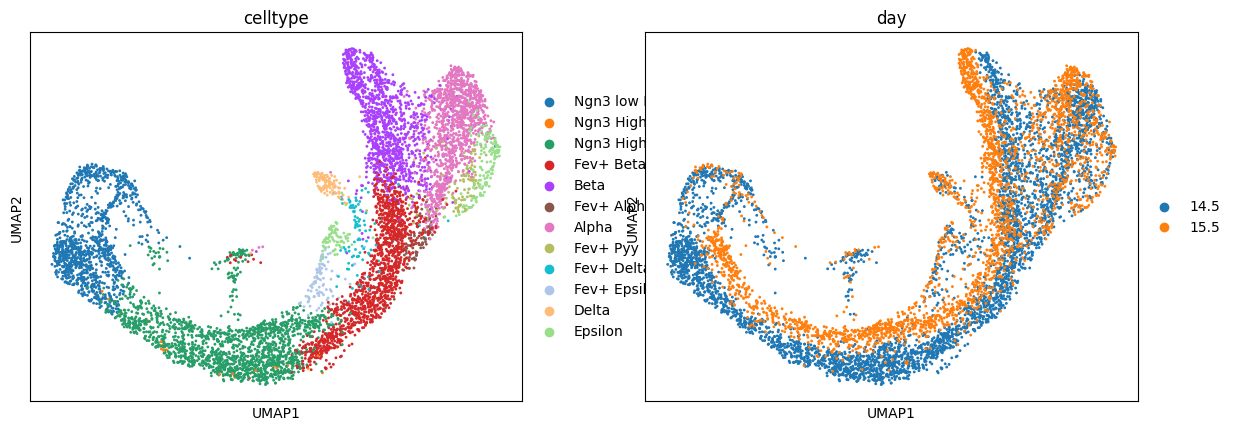

In [11]:
sc.pl.umap(adata_endocrine, color=["celltype", "day"])

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


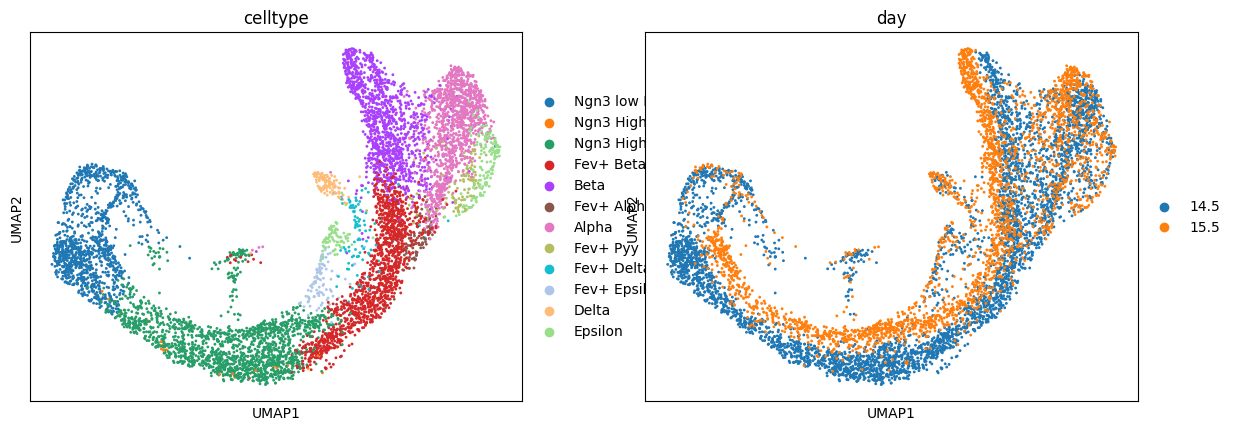

In [ ]:
sc.pl.umap(adata_endocrine, color=["celltype", "day"])

In [13]:
adata_endocrine.write("../../../../data/adata_pancreas_2019_processed_new.h5ad")